# Guia 2.2

# Ejercicio 2

Escriba una función que realice la convolución circular discreta (también llamada convolución periódica) entre dos señales $x[n]$ y $h[n]$, ambas de longitud N muestras, utilizando ciclos for. En ésta se debe considerar a $x[n]$ periódica, pero $h[n]$ debe ser nula fuera de su rango de definición. La convolución circular se puede expresar mediante la siguiente ecuación:
$$
y[n] = \sum^{N}_{k=1} h[k]x[((N+n-k)modN)+1]
$$
Para $1\leq k \leq N$, donde mod es la operación módulo entero (resto de la división entera).

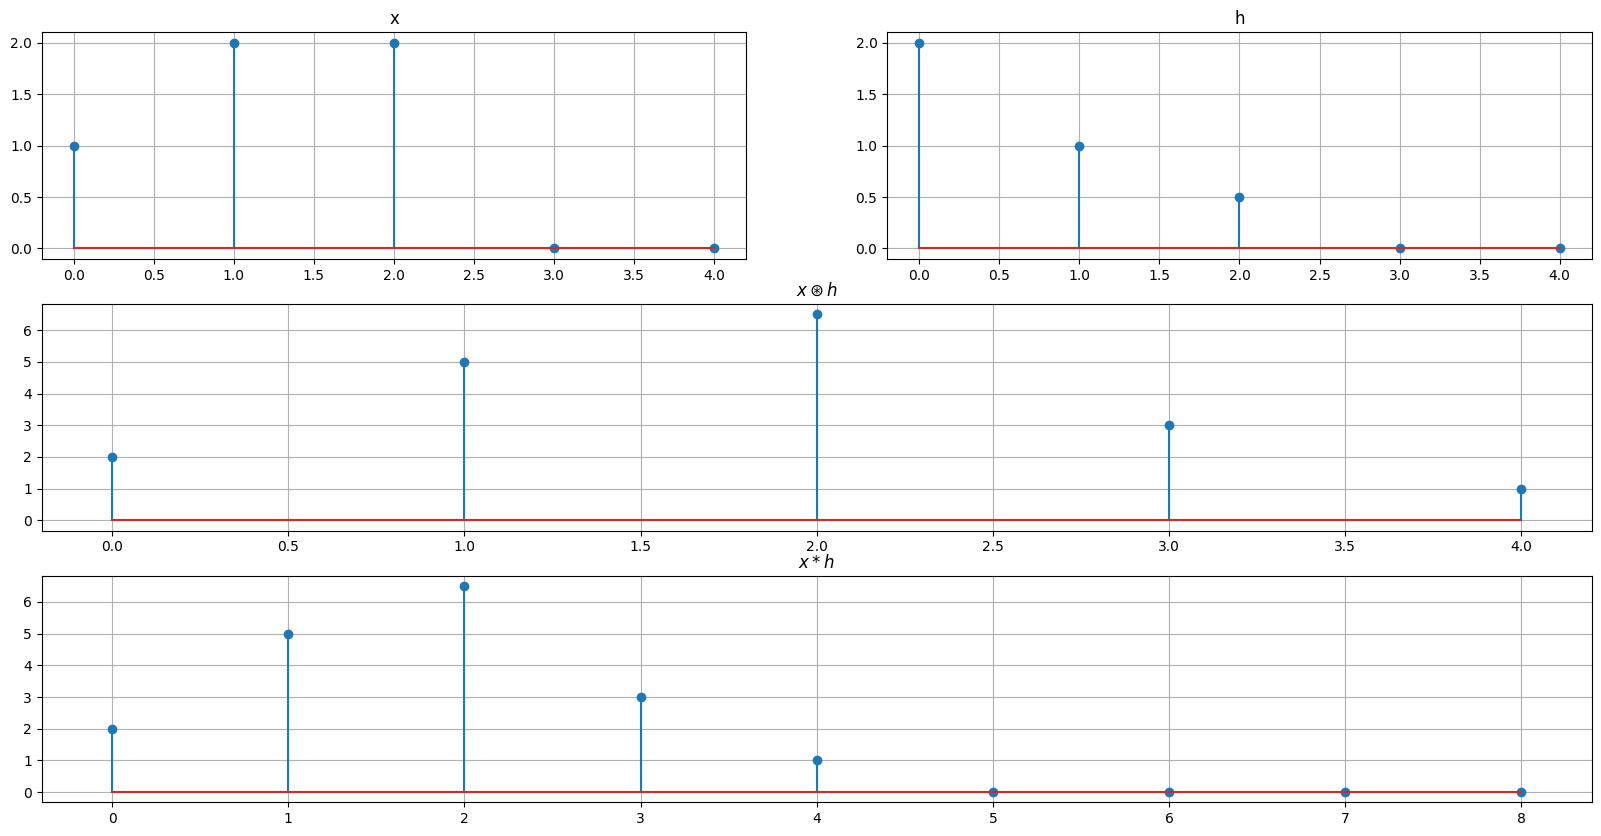

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def convCirc(x,h):
    """
    realiza la convolucion circular/periodica

    Args:
        x (array): senial de longitud N
        h (array): senial de misma longitud N

    Returns:
        array: convolucion circular de longitud N
    """
    if(len(x) != len(h)):
        raise Exception(f"len(x) = {len(x)} != len(h) = {len(h)}")
    N = len(x)
    # inicializar suma
    y = [0]*len(x)

    for n in range(N):
        for k in range(N):
            if(k < 0 or k >= N or n < 0 or n >= N or np.remainder(N+n-k, N) < 0 or np.remainder(N+n-k, N) >= N):
                raise Exception(f"k = {k}\nn = {n}\nN+n-k = {np.remainder(N+n-k, N)}")
            y[n] += h[k]*x[np.remainder(N+n-k, N)]

    return y

def convolucion(x,h):
    N = len(x)
    M = len(h)
    
    c = [0]*(N+M-1)
    
    c += x[0] * np.concatenate((h, np.zeros(N-1)))
    for n in range(1,len(x)-1):
        c += x[n] * np.concatenate((np.zeros(n,dtype=float), h, np.zeros(N-1-n,dtype=float)))

    return c

# Test
h = [2,1,0.5,0,0]
x = [1,2,2,0,0]

y = convCirc(x,h)

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

ax = [0]*4
ax[0] = plt.subplot2grid((3,2), (0,0))
ax[1] = plt.subplot2grid((3,2), (0,1), sharey=ax[0])
ax[2] = plt.subplot2grid((3,2), (1,0), colspan=2)
ax[3] = plt.subplot2grid((3,2), (2,0), colspan=2, sharey=ax[2])

for i in range(4):
    ax[i].grid()

# x
ax[0].set_title('x')
ax[0].stem(x)
# h
ax[1].set_title('h')
ax[1].stem(h)
# convCircular
ax[2].set_title('$x \\circledast h$')
ax[2].stem(convCirc(x,h))
# conv lineal
ax[3].set_title('$x * h$')
ax[3].stem(convolucion(x,h))

plt.show()